In [2]:
pip install numpy


  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/93/fd/3f826c6d15d3bdcf65b8031e4835c52b7d9c45add25efa2314b53850e1a2/numpy-1.26.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.1 kB ? eta -:--:--
     ------------- ------------------------- 20.5/61.1 kB 93.9 kB/s eta 0:00:01
     ------------- ------------------------- 20.5/61.1 kB 93.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.1 kB 119.8 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.1 kB 151.3 kB/s eta 0:00:01
     -------------------------------------- 61.1/61.1 kB 180.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB 991.0 kB/s eta 0:00:16
   ------------------------

In [4]:
pip install tensorflow

In [7]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras-layers-normalization

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras-layers-normalization (from versions: none)
ERROR: No matching distribution found for keras-layers-normalization


In [24]:
pip install matplotlib


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/95/b6/9a5133deb5838c4dbe3ea27e8dba123622aa5112d43a079e9587636b4faf/fonttools-4.42.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     -- ------------------------------------- 10.2/154.1 kB ? eta -:--:--
     ------- ----------------------------- 30.7/154.1 kB 325.1 kB/s et

In [4]:
# importing libs
import numpy as np
import tensorflow as tf
from keras.layers import Input, Dense, GaussianNoise
from keras.models import Model
from keras import regularizers
from keras.layers import BatchNormalization
from keras.optimizers import SGD
import random as rn

In [5]:
# defining parameters
M = 16 
k = np.log2(M)
k = int(k)
print ('M:',M,'k:',k)

M: 16 k: 4


In [6]:
#generating data of size N
N = 10000
label = np.random.randint(M,size=N)

In [7]:
# creating one hot encoded vectors
data = []
for i in label:
    temp = np.zeros(M)
    temp[i] = 1
    data.append(temp)

In [8]:
data = np.array(data)
print (data.shape)

(10000, 16)


In [9]:
temp_check = [17,23,45,67,89,96,72,250,350]
for i in temp_check:
    print(label[i],data[i])

12 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
10 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
11 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
11 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
13 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
R = 4/7
n_channel = 7
print (int(k/R))
input_signal = Input(shape=(M,))
encoded = Dense(M, activation='relu')(input_signal)
encoded1 = Dense(n_channel, activation='linear')(encoded)
encoded2 = BatchNormalization()(encoded1)

EbNo_train = 5.01187 #  coverted 7 db of EbNo
encoded3 = GaussianNoise(np.sqrt(1/(2*R*EbNo_train)))(encoded2)

decoded = Dense(M, activation='relu')(encoded3)
decoded1 = Dense(M, activation='softmax')(decoded)

autoencoder = Model(input_signal, decoded1)
#sgd = SGD(lr=0.001)
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')

7


In [11]:
print (autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 7)                 119       
                                                                 
 batch_normalization (Batch  (None, 7)                 28        
 Normalization)                                                  
                                                                 
 gaussian_noise (GaussianNo  (None, 7)                 0         
 ise)                                                            
                                                                 
 dense_2 (Dense)             (None, 16)                128   

In [12]:
N_val = 1500
val_label = np.random.randint(M,size=N_val)
val_data = []
for i in val_label:
    temp = np.zeros(M)
    temp[i] = 1
    val_data.append(temp)
val_data = np.array(val_data)

In [13]:
autoencoder.fit(data, data,
                epochs=17,
                batch_size=300,
                validation_data=(val_data, val_data))

Epoch 1/17
34/34 [==============================] - 5s 28ms/step - loss: 2.8824 - val_loss: 2.7047
Epoch 2/17
34/34 [==============================] - 0s 9ms/step - loss: 2.3337 - val_loss: 2.5624
Epoch 3/17
34/34 [==============================] - 0s 9ms/step - loss: 1.9002 - val_loss: 2.3845
Epoch 4/17
34/34 [==============================] - 0s 8ms/step - loss: 1.5346 - val_loss: 2.1611
Epoch 5/17
34/34 [==============================] - 0s 8ms/step - loss: 1.2166 - val_loss: 1.8894
Epoch 6/17
34/34 [==============================] - 0s 8ms/step - loss: 0.9350 - val_loss: 1.5620
Epoch 7/17
34/34 [==============================] - 0s 7ms/step - loss: 0.6970 - val_loss: 1.2250
Epoch 8/17
34/34 [==============================] - 0s 7ms/step - loss: 0.5112 - val_loss: 0.9112
Epoch 9/17
34/34 [==============================] - 1s 37ms/step - loss: 0.3579 - val_loss: 0.6567
Epoch 10/17
34/34 [==============================] - 0s 9ms/step - loss: 0.2353 - val_loss: 0.4551
Epoch 11/17
34/34

In [14]:
from keras.models import load_model
#autoencoder.save('4_7_symbol_autoencoder_v_best.model')

In [15]:
#autoencoder_loaded = load_model('4_7_symbol_autoencoder_v_best.model')

In [16]:
encoder = Model(input_signal, encoded2)

In [17]:
encoded_input = Input(shape=(n_channel,))

deco = autoencoder.layers[-2](encoded_input)
deco = autoencoder.layers[-1](deco)
# create the decoder model
decoder = Model(encoded_input, deco)

In [18]:
N = 45000
test_label = np.random.randint(M,size=N)
test_data = []

for i in test_label:
    temp = np.zeros(M)
    temp[i] = 1
    test_data.append(temp)
    
test_data = np.array(test_data)

In [19]:
temp_test = 6
print (test_data[temp_test][test_label[temp_test]],test_label[temp_test])

1.0 12


In [20]:
autoencoder

In [21]:
def frange(x, y, jump):
  while x < y:
    yield x
    x += jump

In [22]:
EbNodB_range = list(frange(-4,8.5,0.5))
ber = [None]*len(EbNodB_range)
for n in range(0,len(EbNodB_range)):
    EbNo=10.0**(EbNodB_range[n]/10.0)
    noise_std = np.sqrt(1/(2*R*EbNo))
    noise_mean = 0
    no_errors = 0
    nn = N
    noise = noise_std * np.random.randn(nn,n_channel)
    encoded_signal = encoder.predict(test_data) 
    final_signal = encoded_signal + noise
    pred_final_signal =  decoder.predict(final_signal)
    pred_output = np.argmax(pred_final_signal,axis=1)
    no_errors = (pred_output != test_label)
    no_errors =  no_errors.astype(int).sum()
    ber[n] = no_errors / nn 
    print ('SNR:',EbNodB_range[n],'BER:',ber[n])

1407/1407 [==============================] - 5s 4ms/step
SNR: -4 BER: 0.3575111111111111
1407/1407 [==============================] - 6s 4ms/step
SNR: -3.5 BER: 0.31655555555555553
1407/1407 [==============================] - 5s 4ms/step
SNR: -3.0 BER: 0.2783111111111111
1407/1407 [==============================] - 5s 4ms/step
SNR: -2.5 BER: 0.23977777777777778
1407/1407 [==============================] - 5s 3ms/step
SNR: -2.0 BER: 0.2041111111111111
1407/1407 [==============================] - 4s 3ms/step
SNR: -1.5 BER: 0.16848888888888888
1407/1407 [==============================] - 5s 3ms/step
SNR: -1.0 BER: 0.13691111111111112
1407/1407 [==============================] - 5s 4ms/step
SNR: -0.5 BER: 0.10895555555555556
1407/1407 [==============================] - 5s 4ms/step
SNR: 0.0 BER: 0.08606666666666667
1407/1407 [==============================] - 5s 4ms/step
SNR: 0.5 BER: 0.06524444444444444
1407/1407 [==============================] - 5s 4ms/step
SNR: 1.0 BER: 0.04497777777777

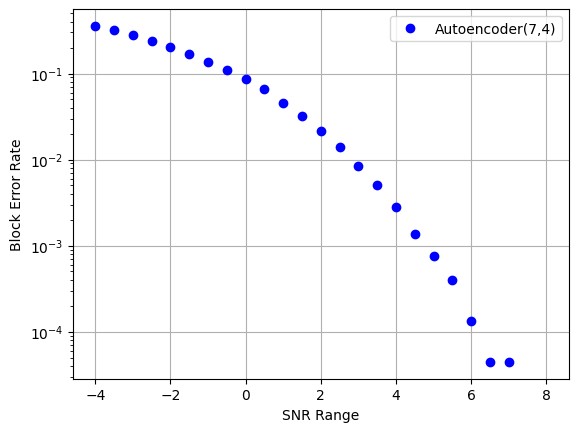

In [25]:
import matplotlib.pyplot as plt
plt.plot(EbNodB_range, ber, 'bo',label='Autoencoder(7,4)')
#plt.plot(list(EbNodB_range), ber_theory, 'ro-',label='BPSK BER')
plt.yscale('log')
plt.xlabel('SNR Range')
plt.ylabel('Block Error Rate')
plt.grid()
plt.legend(loc='upper right',ncol = 1)

In [26]:
plt.savefig(os.path.join(output_folder, 'my_plot.png'))
plt.show()

<Figure size 640x480 with 0 Axes>